        dateCrawled                                               name  \
0  30/03/2016 13:51                                       Zu_verkaufen   
1     7/3/2016 9:54                             Volvo_XC90_2.4D_Summum   
2     1/4/2016 0:57                                  Volkswagen_Touran   
3  19/03/2016 17:50                       Seat_Ibiza_1.4_16V_Reference   
4  16/03/2016 14:51  Volvo_XC90_D5_Aut._RDesign_R_Design_AWD_GSHD_S...   

    seller offerType  price   abtest vehicleType  yearOfRegistration  \
0  private     offer   4450     test   limousine                2003   
1  private     offer  13299  control         suv                2005   
2  private     offer   3200     test         bus                2003   
3  private     offer   4500  control   small car                2006   
4  private     offer  18750     test         suv                2008   

     gearbox  powerPS     model  kilometer  monthOfRegistration fuelType  \
0     manual      150       3er     150000    

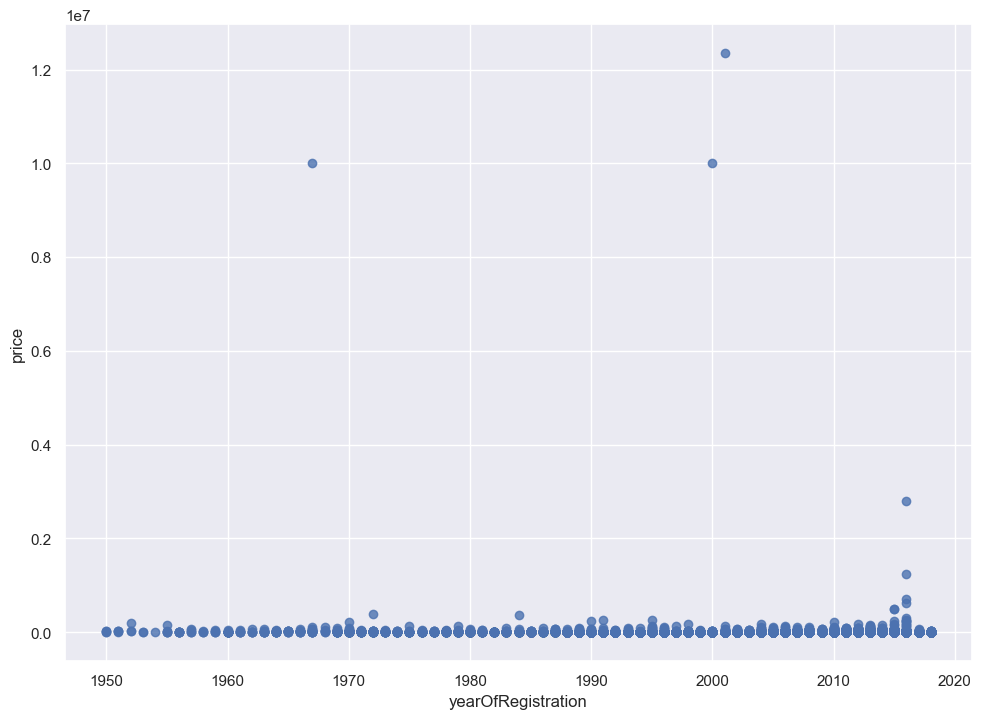

Mean Squared Error: 10033731986.4517
R² Score: 0.0180


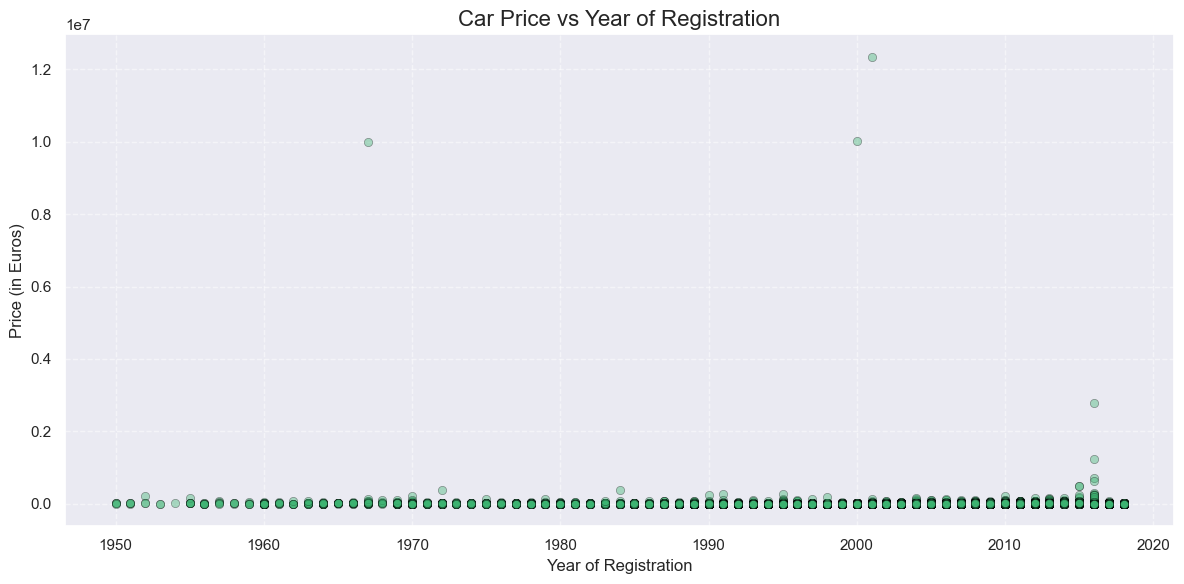

In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler


sns.set(rc={'figure.figsize': (11.7, 8.27)})

# Reading data
cars_data = pd.read_csv('cars_sampled.csv')

# Make a copy to avoid modifying original dataframe
cars = cars_data.copy()

print(cars.head())
print(cars.isnull().sum())



# Remove columns that are not needed
col = ['name', 'dateCrawled', 'dateCreated', 'postalCode', 'lastSeen']
cars.drop(columns=col, axis=1, inplace=True, errors='ignore')  

# Convert categorical features to numerical using one-hot encoding
cars = pd.get_dummies(cars, drop_first=True)  

# Drop duplicates
cars.drop_duplicates(keep='first', inplace=True)



print(cars.isnull().sum())
print(cars.describe())

# Filter out unrealistic 'yearOfRegistration'
year_wise_count = cars['yearOfRegistration'].value_counts().sort_index()
print(f"Cars from 2018 onwards: {sum(cars['yearOfRegistration'] > 2018)}")
print(f"Cars before 1950: {sum(cars['yearOfRegistration'] < 1950)}")

# Filter the years between 1950 and 2018
cars = cars[(cars['yearOfRegistration'] >= 1950) & (cars['yearOfRegistration'] <= 2018)]

# Visualize the relationship between 'yearOfRegistration' and 'price'
sns.regplot(x='yearOfRegistration', y='price', data=cars, scatter=True, fit_reg=False)
plt.show()

# Train-test split
X = cars.drop('price', axis=1)
y = cars['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model training
model = LinearRegression()
model.fit(X_train, y_train)

# Model prediction
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.4f}")
print(f"R² Score: {r2:.4f}")

plt.figure(figsize=(12, 6))
sns.scatterplot(x='yearOfRegistration', y='price', data=cars, alpha=0.4, color='mediumseagreen', edgecolor='black')
plt.title('Car Price vs Year of Registration', fontsize=16)
plt.xlabel('Year of Registration', fontsize=12)
plt.ylabel('Price (in Euros)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

